In [1]:
# Audio Classification Using CNN

import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

DATA_PATH = "data.json"


def load_data(data_path):
    with open(data_path, "r") as fp:
        data = json.load(fp)
        X = np.array(data["mfcc"])
        y = np.array(data["labels"]) - 1
    return X, y

In [3]:
def plot_history(history):
    fig, axs = plt.subplots(2)

    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accucary eval")

    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

There are 3819 data points in training set and input shape is: (259, 13, 1)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 257, 11, 32)       320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 129, 6, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 129, 6, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 127, 4, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 2, 64)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 2, 64)         256       
______________________________________________

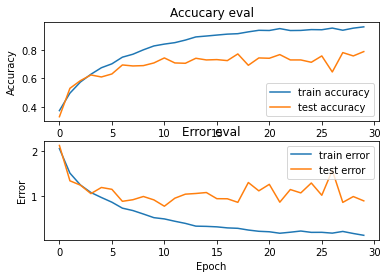

In [4]:
def prepare_data(test_size, validation_size):

    X, y = load_data(DATA_PATH)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    X_train = X_train[..., np.newaxis]
    X_test = X_test[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]

    return X_train, X_validation, X_test, y_train, y_validation, y_test


def build_model(input_shape):

    model = keras.Sequential()

    model.add(keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=input_shape))
    model.add(keras.layers.MaxPool2D((3, 3), strides=(2, 2), padding="same"))
    model.add(keras.layers.BatchNormalization())

    model.add(keras.layers.Conv2D(64, (3, 3), activation="relu"))
    model.add(keras.layers.MaxPool2D((3, 3), strides=(2, 2), padding="same"))
    model.add(keras.layers.BatchNormalization())

    model.add(keras.layers.Conv2D(128, (2, 2), activation="relu"))
    model.add(keras.layers.MaxPool2D((3, 3), strides=(2, 2), padding="same"))
    model.add(keras.layers.BatchNormalization())

    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(128, activation="relu"))
    model.add(keras.layers.Dropout(0.4))
    model.add(keras.layers.Dense(64, activation="relu"))
    model.add(keras.layers.Dropout(0.2))

    model.add(keras.layers.Dense(10, activation="softmax"))

    return model


def predict(model, X, y):

    X = X[np.newaxis, ...]
    prediction = model.predict(X)
    predicted_value = np.argmax(prediction, axis=1)

    print("Target: {}, Predicted label: {}".format(y, predicted_value))




X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_data(test_size=.15, validation_size=.1)

input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3])
print(f"There are {X_train.shape[0]} data points in training set and input shape is: {input_shape}")

model = build_model(input_shape=input_shape)

model.compile(optimizer=keras.optimizers.Adam(learning_rate=.001),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.summary()

history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), epochs=30, batch_size=32)

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print("\nTest Accuracy: ", test_accuracy)

X_to_predict, y_to_predict = X_test[2], y_test[2]
predict(model, X_to_predict, y_to_predict)

plot_history(history)

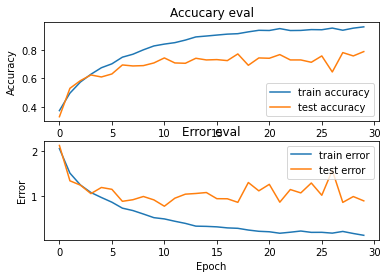

In [5]:
plot_history(history)